Syed Huma Shah

netid: ss1516

I used gpt5 for this assignment

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1h5GjwfMXadSJQ0jSn5ycaqe3_yYz8x_2?usp=sharing)

# Explaining Gun Violence Severity in the U.S. via ALE/PDP/ICE





Link to the mass shooting dataset from 2014 to 2025: https://datahub.thetrace.org/dataset/mass-shootings/#download

Gun violence remains one of the most urgent and contested social challenges in the United States. Mass shooting events typically defined as incidents in which four or more people are shot (injured or killed), excluding the shooter garner intense media attention and provoke policy debates around firearms regulation, mental health, and public safety.  ￼

The Gun Violence Archive (GVA) is an independent, nonprofit initiative that collects near-real-time data on gun violence incidents across the U.S., combining law enforcement, media, government, and commercial sources.  ￼
The dataset I’m using consists of mass shooting incidents from 2014 to 2025, enriched with fields such as the number of killed, injured, incident location (latitude/longitude, state, city/county), and other attributes (e.g. suspects arrested or injured).  ￼

In my analysis, I engineer a target variable (e.g. severity = number killed + number injured) and derive additional features (e.g. total suspects involved, temporal features). With this dataset, I train a model (e.g. Random Forest) to predict severity.

In [1]:
import pandas as pd
import numpy as np

In [2]:
#loading dataset
df = pd.read_csv("/content/gva_mass_shootings-2025-09-28.csv")
df.head()

,incident_id,incident_date,incident_time,updated_date,state,city_or_county,address,business_location_name,latitude,longitude,...,injured,victims_killed,victims_injured,suspects_killed,suspects_injured,suspects_arrested,incident_characteristics,sources,date_fixed,year
0,809048,"April 1, 2017",NaN,1491348530,Florida,Tampa,219 S Howard Ave,Palace Lounge,27.9431,-82.4831,...,4,1,4,0,0,1,"Shot - Wounded/Injured, Shot - Dead (murder, a...","c(""http://wfla.com/2017/04/01/tampa-police-inv...",2017-04-01,2017
1,809499,"April 1, 2017",5:25 AM,1680156402,Oklahoma,Oklahoma City,1212 N Woodward Ave,NaN,35.4810,-97.5754,...,3,2,3,0,0,1,"Shot - Wounded/Injured, Shot - Dead (murder, a...","c(""http://www.news9.com/story/35055747/okc-pol...",2017-04-01,2017
2,809815,"April 1, 2017",NaN,1492995601,California,Pittsburg,100 block of Madoline Street,NaN,38.0053,-121.8950,...,5,0,5,0,0,1,"Shot - Wounded/Injured, Mass Shooting (4+ vict...",http://www.nbcbayarea.com/news/local/Shooting-...,2017-04-01,2017
3,1082835,"April 1, 2018",2:15 AM,1522693801,Michigan,Saginaw,600 block of Yale St,NaN,43.4192,-83.9819,...,5,0,5,0,0,0,"Shot - Wounded/Injured, Mass Shooting (4+ vict...",http://www.mlive.com/news/saginaw/index.ssf/20...,2018-04-01,2018
4,1083011,"April 1, 2018",NaN,1646889853,Alabama,Mobile,3556 Halls Mill Rd,Grand Hall,30.6387,-88.1228,...,4,1,4,0,0,3,"Shot - Wounded/Injured, Shot - Dead (murder, a...","c(""http://www.al.com/news/mobile/index.ssf/201...",2018-04-01,2018


## Exploratory Data Analysis

In [3]:
df.describe() #checking the statistical values for each column

,incident_id,updated_date,latitude,longitude,killed,injured,victims_killed,victims_injured,suspects_killed,suspects_injured,suspects_arrested,year
count,5.468000e+03,5.468000e+03,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000
mean,1.798512e+06,1.625904e+09,37.022297,-89.748921,1.065838,4.224031,1.002743,4.180139,0.063094,0.043892,0.607169,2020.082663
std,8.972005e+05,9.289517e+07,4.835056,13.609488,1.867002,6.365471,1.770795,6.352886,0.250565,0.246974,1.110355,3.125175
min,9.219400e+04,1.429643e+09,21.327600,-166.729000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000
25%,1.064002e+06,1.565281e+09,33.506200,-93.868450,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2018.000000
50%,1.928177e+06,1.637134e+09,37.956600,-87.594000,1.000000,4.000000,1.000000,4.000000,0.000000,0.000000,0.000000,2021.000000
75%,2.532108e+06,1.703125e+09,40.805450,-80.251475,1.000000,5.000000,1.000000,5.000000,0.000000,0.000000,1.000000,2023.000000
max,3.294737e+06,1.756489e+09,68.348800,-67.467500,61.000000,439.000000,60.000000,439.000000,3.000000,5.000000,14.000000,2025.000000


In [4]:
df.isna().sum() #chekcing na valuesß

,0
incident_id,0
incident_date,0
incident_time,1288
updated_date,0
state,0
city_or_county,0
address,18
business_location_name,3490
latitude,0
longitude,0


## Data Processing and Feature engineering

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# 2. Create target variable (choose severity)
df['severity'] = df['killed'] + df['injured']


# 3. Drop or transform unhelpful columns
drop_cols = ['incident_id', 'updated_date', 'sources', 'address', 'incident_characteristics',
             'incident_time', 'business_location_name']
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

# 4. Handle missing values
# For string / categorical columns with NAs: fill with “unknown”
for c in ['city_or_county', 'state']:
    df[c] = df[c].fillna("unknown")
# 5. Date / time feature engineering

df['date_fixed'] = pd.to_datetime(df['date_fixed'], errors='coerce')
df['year'] = df['date_fixed'].dt.year
df['month'] = df['date_fixed'].dt.month
df['dayofweek'] = df['date_fixed'].dt.dayofweek  # 0=Monday, …6=Sunday
df['is_weekend'] = df['dayofweek'].isin([5,6]).astype(int)


# combining suspect_killed + suspects_injured into a single “suspect_total_involved”
df['suspect_total_involved'] = df['suspects_killed'].fillna(0) + df['suspects_injured'].fillna(0)
df = df.drop(columns=['suspects_killed', 'suspects_injured'], errors='ignore')


df = df[df['severity'] > 0]  # excluding events with zero victims

# Split into train / test
X = df.drop(columns=['severity'])
y = df['severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# settign up trianign pipeline for numerical and categorical fetaures
num_feats = ['latitude', 'longitude', 'month', 'dayofweek', 'suspect_total_involved']
cat_feats = ['state', 'city_or_county']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_feats),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feats)
])

# modeling pipeline
from sklearn.ensemble import RandomForestRegressor
model = Pipeline([
    ('preproc', preprocessor),
    ('reg', RandomForestRegressor(n_estimators=200, random_state=42))
])

model.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['latitude', 'longitude',
                                                   'month', 'dayofweek',
                                                   'suspect_total_involved']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['state',
                                                   'city_or_county'])])),
                ('reg',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

#Exploratory and Correlation Analaysis
Discuss any interesting findings that are shown in the plots. Discuss any differences you see in the PDP and ALE plots. Discuss your exploratory findings around correlation between features and the impact this has (if any) on your results.

,latitude,longitude,month,dayofweek,suspect_total_involved,severity
count,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000
mean,37.022297,-89.748921,6.620885,3.895574,0.106986,5.289868
std,4.835056,13.609488,3.036185,2.041788,0.351748,7.271670
min,21.327600,-166.729000,1.000000,0.000000,0.000000,4.000000
25%,33.506200,-93.868450,4.000000,2.000000,0.000000,4.000000
50%,37.956600,-87.594000,7.000000,5.000000,0.000000,4.000000
75%,40.805450,-80.251475,9.000000,6.000000,0.000000,5.000000
max,68.348800,-67.467500,12.000000,6.000000,5.000000,500.000000


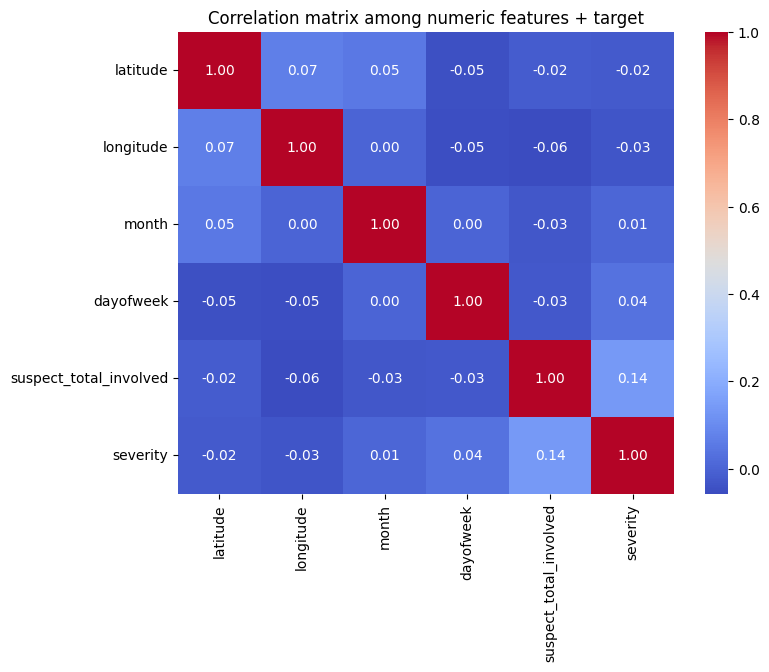

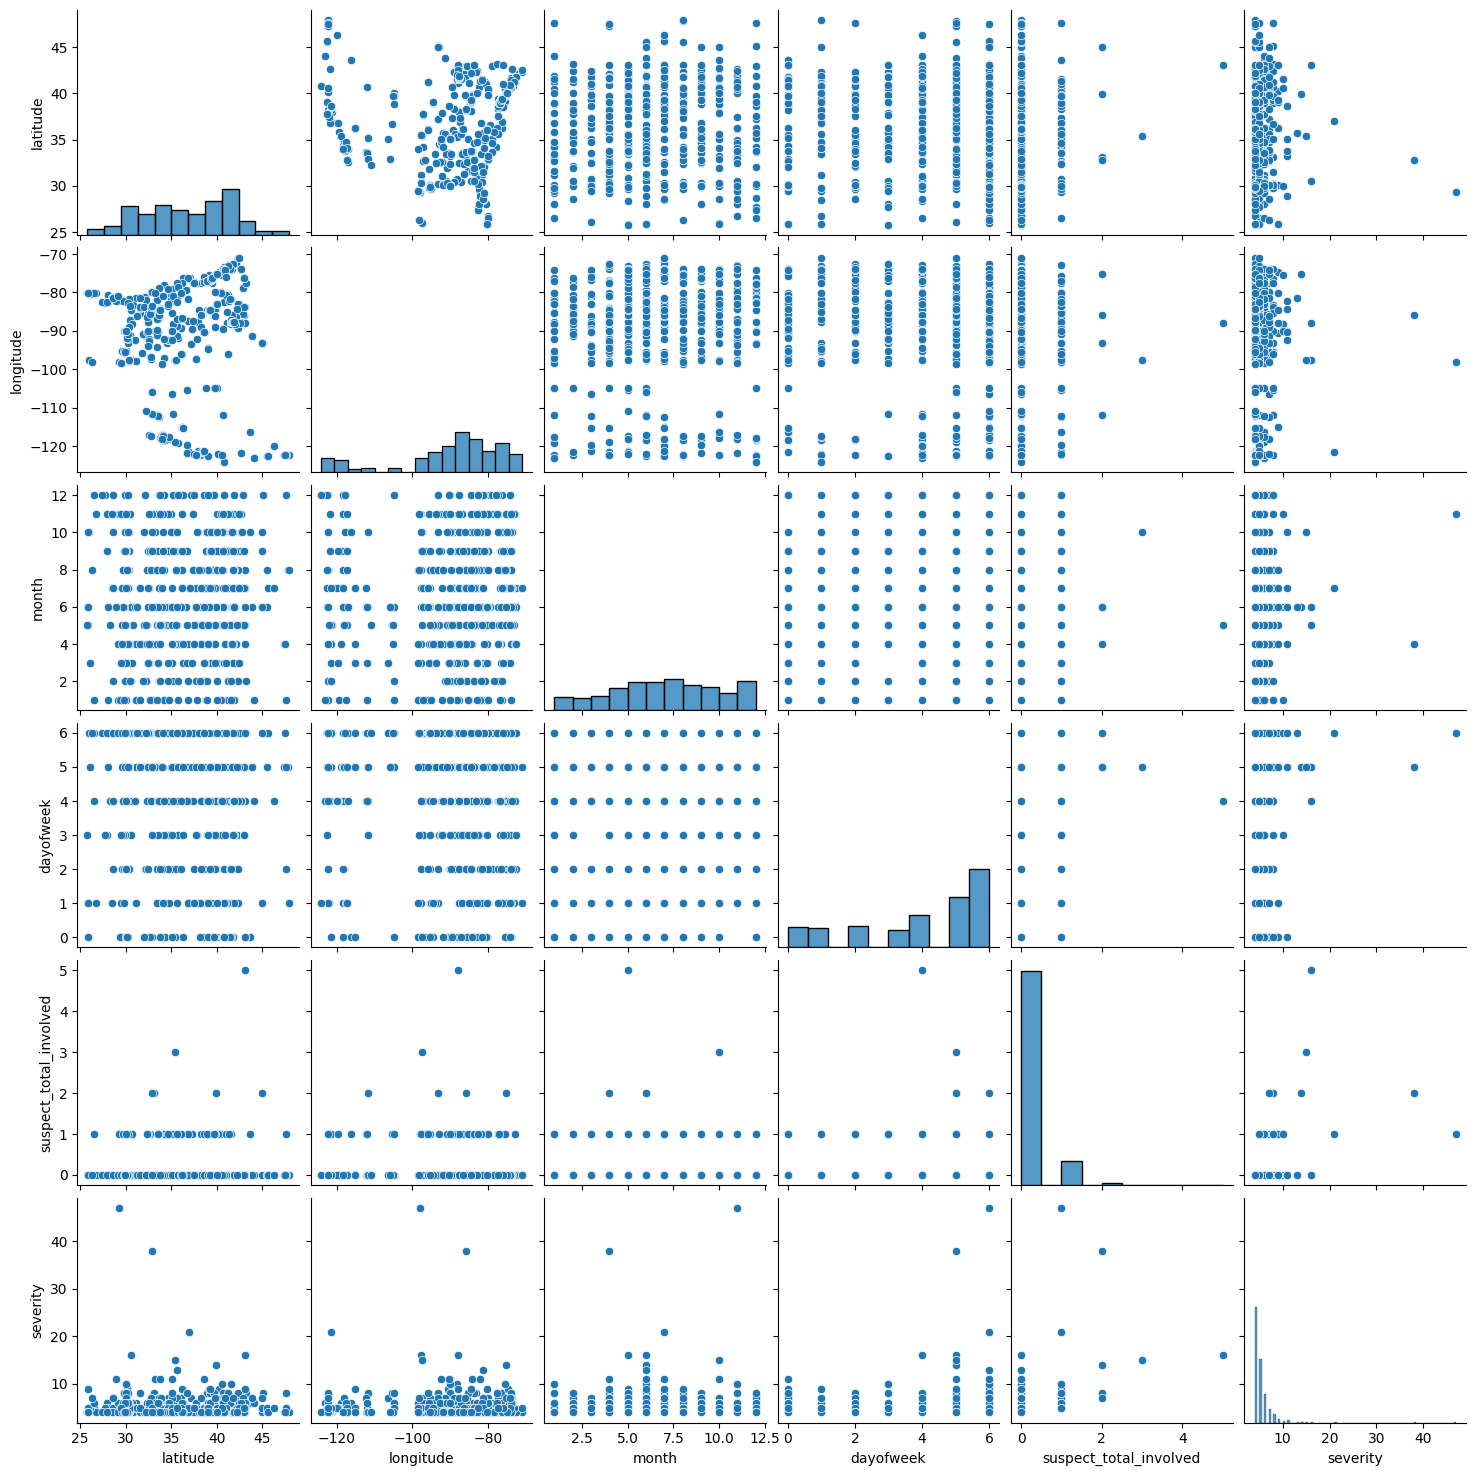

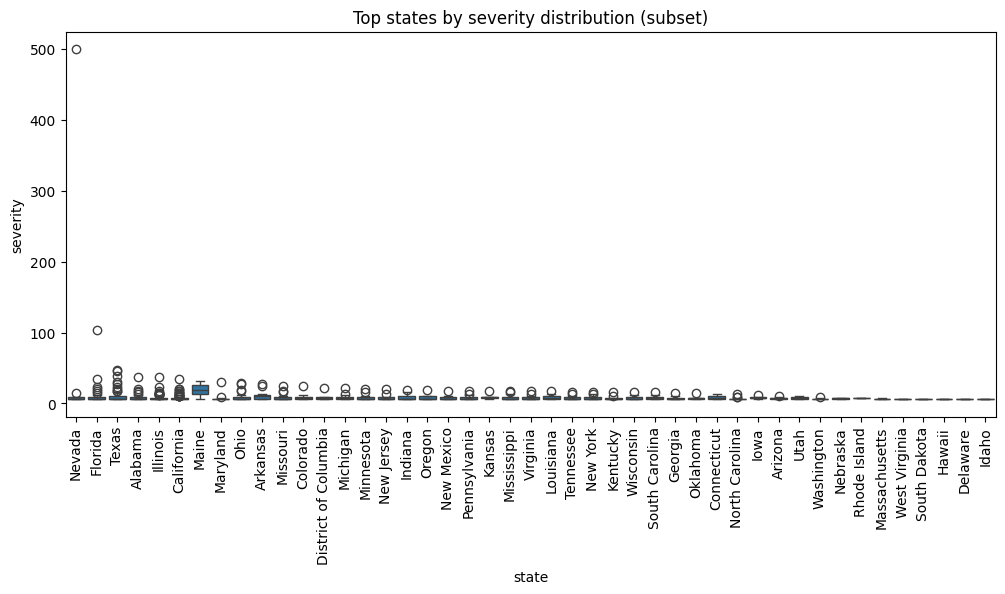

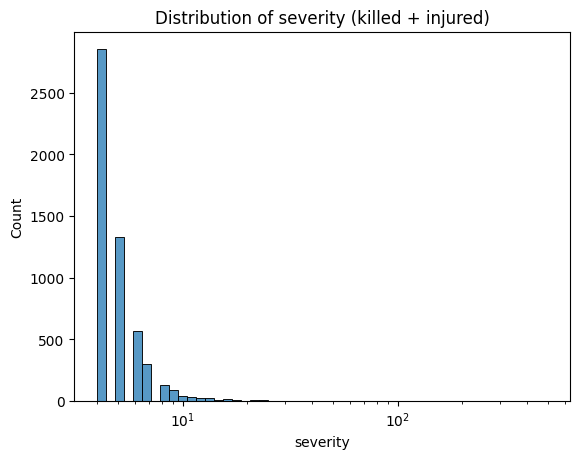

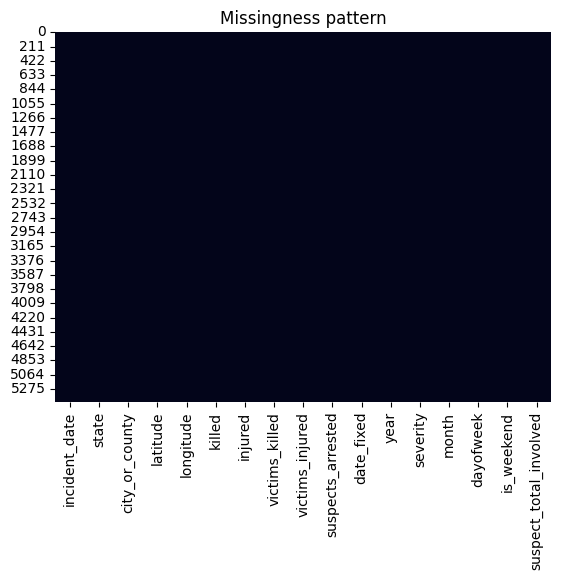

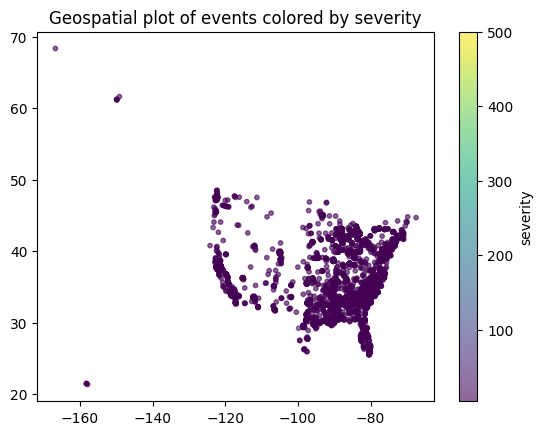

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Summary statistics
display(df[num_feats + ['severity']].describe())

# 2. Correlation matrix (numerical features + target)
corr = df[num_feats + ['severity']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation matrix among numeric features + target")
plt.show()

# 3. Pairplots / scatter plots
sns.pairplot(df[num_feats + ['severity']].sample(500))

# 4. Boxplots / violin plots of severity by categorical
plt.figure(figsize=(12, 5))
sns.boxplot(x='state', y='severity', data=df.sort_values('severity', ascending=False).head(1000))
plt.xticks(rotation=90)
plt.title("Top states by severity distribution (subset)")
plt.show()

# 5. Histogram / distribution of severity
plt.figure()
sns.histplot(df['severity'], bins=50, log_scale=(True, False))
plt.title("Distribution of severity (killed + injured)")
plt.show()

# 6. Check missingness pattern
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missingness pattern")
plt.show()

# 7. Scatter of latitude vs severity, longitude vs severity
plt.scatter(df['longitude'], df['latitude'], c=df['severity'], cmap='viridis', s=10, alpha=0.6)
plt.colorbar(label='severity')
plt.title("Geospatial plot of events colored by severity")
plt.show()

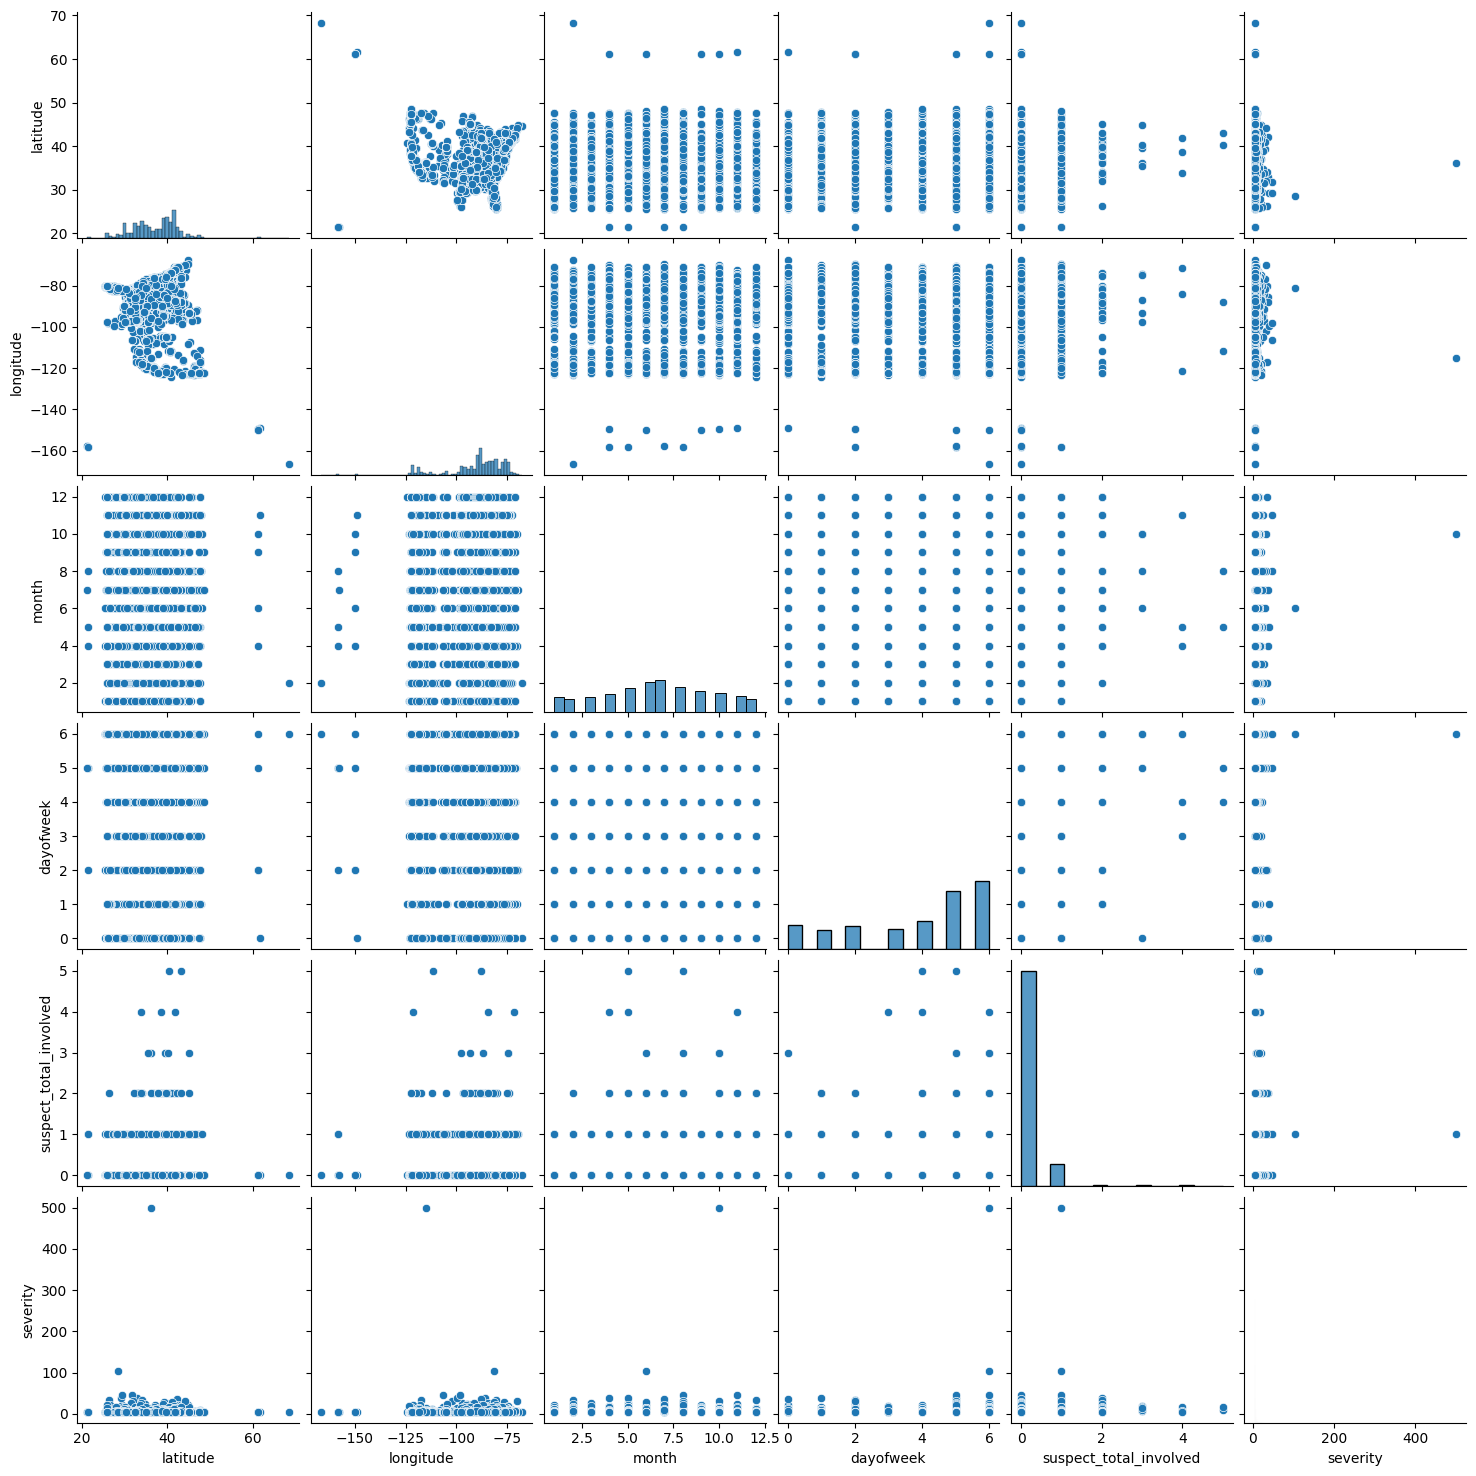

In [26]:
#Pairplots / scatter plots
sns.pairplot(df[num_feats + ['severity']])



In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculating vif for the numerical columns
num_df = df[num_feats].fillna(0)
vifs = pd.DataFrame({
    'feature': num_df.columns,
    'VIF': [variance_inflation_factor(num_df.values, i) for i in range(num_df.shape[1])]
})
print(vifs)

                  feature        VIF
0                latitude  26.567911
1               longitude  26.128867
2                   month   5.623964
3               dayofweek   4.518541
4  suspect_total_involved   1.098285



# Exploratory and Correlation Analysis

## Exploratory Findings


The distribution of severity (killed + injured) is highly right-skewed, as seen in the histogram. The majority of incidents involve fewer than 5 victims, while a small number of events have extreme values (over 100 victims), indicating the presence of outliers such as mass-casualty shootings. It looks like most shootings have limited casualties, a few rare incidents drive up the average severity substantially. This trend can also be seen in the boxplot of severity by state as it shows that most states have median severities close to zero, which confirms that gun violence incidents are typically localized and small in scale. However, states like Nevada, Florida, and Texas exhibit heavier tails with occasional extreme incidents (e.g., the Las Vegas shooting), which disproportionately increase severity scores. This variability implies strong regional differences, where certain states face few high-severity events rather than consistent incidents of mass-shootings.

The geospatial plot alos shows that incidents cluster densely in the eastern half of the U.S., with fewer events in the Midwest and sparse points in Alaska and Hawaii. High-severity cases do not appear to concentrate in a specific latitude–longitude band; rather, they occur sporadically across urbanized regions.



## Correlation Findings

The correlation matrix quantifies the linear relationships among numeric variables. Overall, correlations are weak across all features, with coefficients ranging between −0.06 and +0.14.

  * The strongest relationship is observed between suspect_total_involved and severity (r = 0.14), suggesting a small but meaningful association — incidents with more suspects tend to result in greater harm.

  * Temporal variables like month (r = 0.01) and dayofweek (r = 0.04) show near-zero correlation with severity, indicating that severity levels are not seasonally or weekly patterned.

  * Spatial coordinates latitude (r = -0.02) and longitude (r = -0.03) also have negligible relationships, implying that location alone does not linearly predict casualty numbers, though non-linear spatial factors might still exist.

The Variance Inflation Factor (VIF) analysis provides insight into multicollinearity:

Feature	VIF
Latitude	26.57
Longitude	26.13
Month	5.62
Day of Week	4.52
Suspect Total Involved	1.10

VIF values above 10 suggest strong collinearity, particularly between latitude and longitude, which is expected as both jointly define spatial position. Temporal features (month and dayofweek) show moderate multicollinearity, possibly reflecting repeated cyclical patterns across months and weeks.


In summary, the exploratory and correlation analysis reveals:

* The data is heavily right-skewed in severity.

* Spatial features are interdependent, but weakly predictive of severity.

* Suspect involvement is the most interpretable predictor with a slight positive association with severity.

* Temporal features show no strong effect, suggesting that the timing of incidents is not a dominant driver of severity in the dataset.





##

# PDP Plots

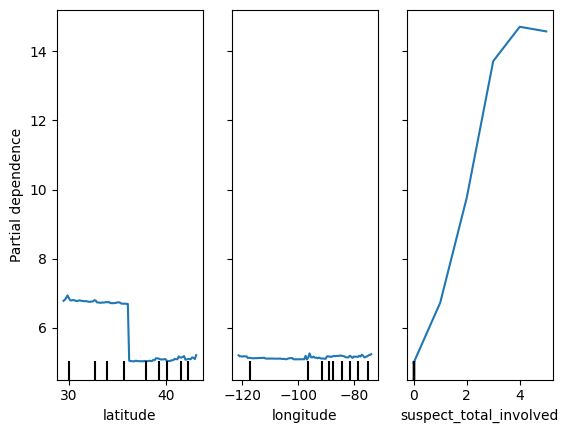

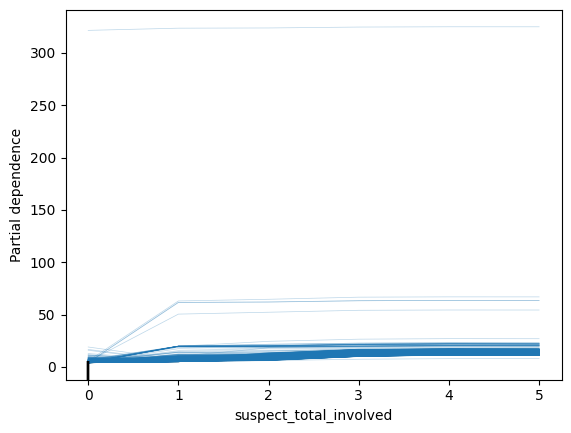

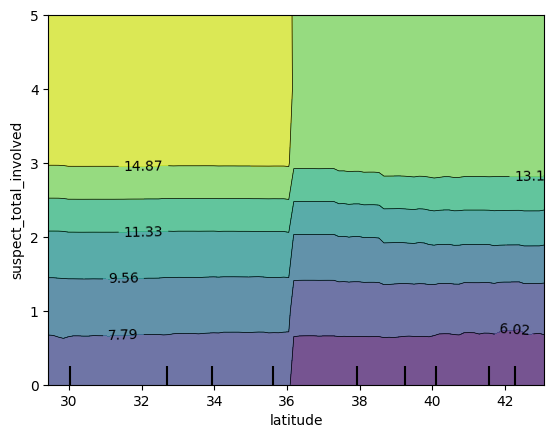

In [14]:
from sklearn.inspection import PartialDependenceDisplay, partial_dependence

# PDP for a few features
features_to_plot = ['latitude', 'longitude', 'suspect_total_involved']
PartialDependenceDisplay.from_estimator(model, X_train, features=features_to_plot, kind='average')
plt.show()

# ICE: individual effects (for suspect_total_involved, say)
PartialDependenceDisplay.from_estimator(model, X_train, features=['suspect_total_involved'], kind='individual')
plt.show()

# You can also do 2D PDP:
PartialDependenceDisplay.from_estimator(model, X_train, features=[('latitude', 'suspect_total_involved')])
plt.show()

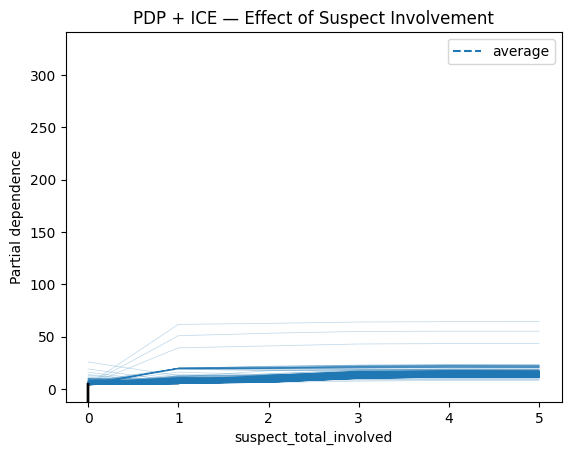

In [28]:
PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=['suspect_total_involved'],
    kind='both'
)
plt.title("PDP + ICE — Effect of Suspect Involvement")
plt.show()

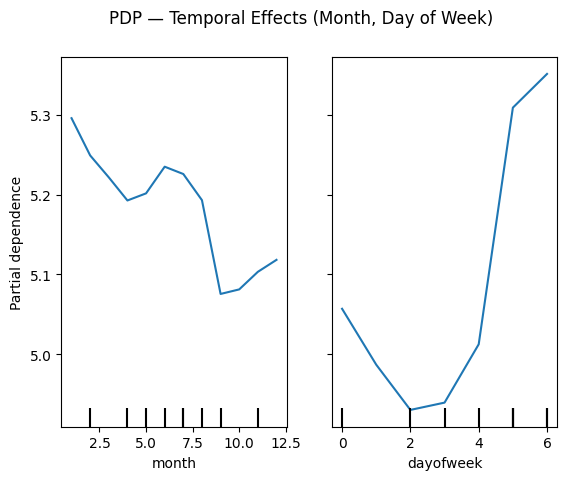

In [29]:
PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=['month', 'dayofweek'],
    kind='average'
)
plt.suptitle("PDP — Temporal Effects (Month, Day of Week)")
plt.show()

# ALE plots

In [ ]:
#pip install alibi

In [7]:
# 4) ALE with Alibi: pass a *DataFrame* and refer to feature by *name*
from alibi.explainers import ALE

def predict_fn(X_df_like):
    # ensure we hand a DataFrame with the right columns to the pipeline
    if not isinstance(X_df_like, pd.DataFrame):
        X_df_like = pd.DataFrame(X_df_like, columns=X_train.columns)
    return model.predict(X_df_like)
col_idx = X_train.columns.get_loc('suspect_total_involved')

ale = ALE(predict_fn, feature_names=X_train.columns.tolist())
ale_exp = ale.explain(X_train.to_numpy(), features=[col_idx])  # int index instead of string

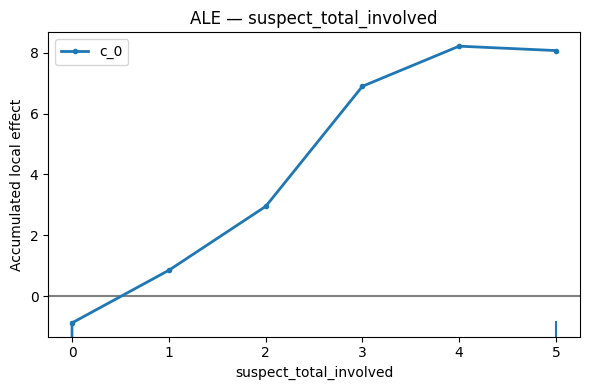

In [8]:
import matplotlib.pyplot as plt
from alibi.explainers.ale import plot_ale

fig, ax = plt.subplots(figsize=(6,4))
_ = plot_ale(
    ale_exp,
    features=['suspect_total_involved'],   # or [col_idx]
    ax=ax,
    line_kw={'linewidth': 2}
)
ax.set_title("ALE — suspect_total_involved")
ax.set_xlabel("suspect_total_involved")
ax.set_ylabel("Accumulated local effect")
plt.show()